importing neccesery libraries

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

loading data

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

normalization

In [12]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [6]:
train_images.shape[0]

60000

In [7]:
test_images.shape[0]

10000

reshaping

In [13]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

definign the model

In [15]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)),
    layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3)),
    layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3)),
    layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128),
    layers.LeakyReLU(alpha=0.01),
    layers.Dense(64),
    layers.LeakyReLU(alpha=0.01),
    layers.Dense(10)
])

model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

applying the model

In [16]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2129 - accuracy: 0.9326 - val_loss: 0.0663 - val_accuracy: 0.9803
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0644 - accuracy: 0.9814 - val_loss: 0.0771 - val_accuracy: 0.9764
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0467 - accuracy: 0.9863 - val_loss: 0.0545 - val_accuracy: 0.9846
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0385 - accuracy: 0.9894 - val_loss: 0.0665 - val_accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0328 - accuracy: 0.9910 - val_loss: 0.0487 - val_accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0281 - accuracy: 0.9926 - val_loss: 0.0607 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0238 - accuracy: 0.9936 - val_loss: 0.0748 - val_accuracy

evaluation

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - loss: 0.0822 - accuracy: 0.9872 - 631ms/epoch - 2ms/step

Test accuracy: 0.9872000217437744


plotting accuracy-epoch graph for test and train data

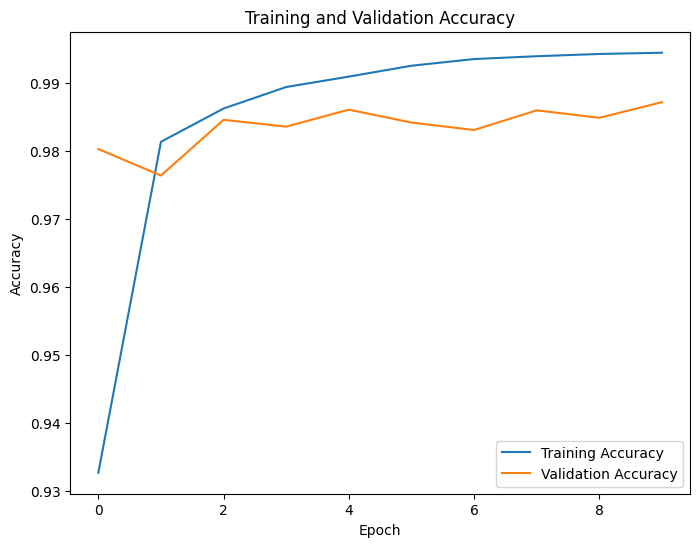

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

making predictions

In [12]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


chacking the predicted and the main label for the first test image

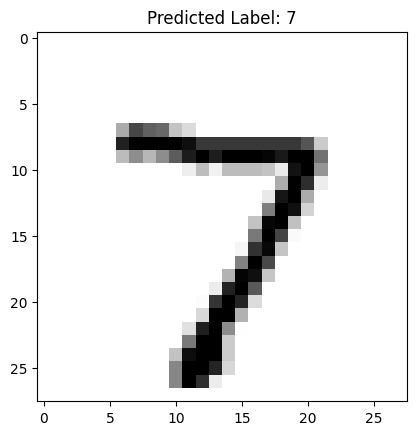

In [13]:
plt.figure()
plt.imshow(test_images[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f'Predicted Label: {tf.argmax(predictions[0])}')
plt.show()